<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20230117ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [2]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta 
import os
import re

from functools import reduce
from collections import defaultdict

# Customer Analysis

In [3]:
os.listdir()

['.config',
 'scanner_data.csv',
 'mock_sales_data.csv',
 '1_customers_dataset.csv',
 'WA_Fn-UseC_-Telco-Customer-Churn.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'bz_data_analyis.csv',
 'groceries.csv',
 '1_order_payments_dataset.csv',
 'sales_data_with_stores.csv',
 'match_result_test.csv',
 'ecommerce-data.csv',
 'mall_customers.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv',
 'sales.csv',
 'online_retail.xlsx',
 'app_wau.csv',
 'online_retail_II.xlsx',
 'sample-sales-data.csv',
 'test.csv',
 'ab_experiment.csv',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'sample_data']

In [5]:
df = pd.read_csv('app_wau.csv')
df.occurred_at = pd.to_datetime(df.occurred_at)
df['date'] = df.occurred_at.to_numpy().astype('datetime64[D]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['weekday'] = df['date'].dt.weekday
df.head()

,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,4


In [6]:
list_weekday = dict(zip(range(7), ['mon','tue','wed','thu','fri','sat','sun']))
df['weekday'] = df['weekday'].apply(lambda x : list_weekday.get(x,x))
df['weekday'].astype('category').cat.reorder_categories([a for a in list_weekday.values()], inplace = True)
df.head()

<ipython-input-6-b0ee8a43b659>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


,user_id,occurred_at,event_type,event_name,location,device,user_type,date,week,weekday
0,10522.0,2014-05-02 11:02:39,engagement,login,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
1,10522.0,2014-05-02 11:02:53,engagement,home_page,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
2,10522.0,2014-05-02 11:03:28,engagement,like_message,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
3,10522.0,2014-05-02 11:04:09,engagement,view_inbox,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri
4,10522.0,2014-05-02 11:03:16,engagement,search_run,Japan,dell inspiron notebook,3.0,2014-05-02,2014-04-28,fri


In [18]:
cnt_login = df[(df['event_name'] == 'login') & (df['location'] == 'United States')][['user_id','week','date','weekday']].drop_duplicates().reset_index().drop(['index'], axis = 1)
cnt_login = cnt_login.groupby(['week','weekday'])['user_id'].count().reset_index().rename(columns = {'user_id':'dau'})
cnt_login['weekday'].astype('category').cat.reorder_categories([a for a in list_weekday.values()], inplace = True)
cnt_login.head()

<ipython-input-18-e09004c3348d>:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.


,week,weekday,dau
0,2014-04-28,fri,95
1,2014-04-28,sat,47
2,2014-04-28,sun,24
3,2014-04-28,thu,86
4,2014-05-05,fri,81


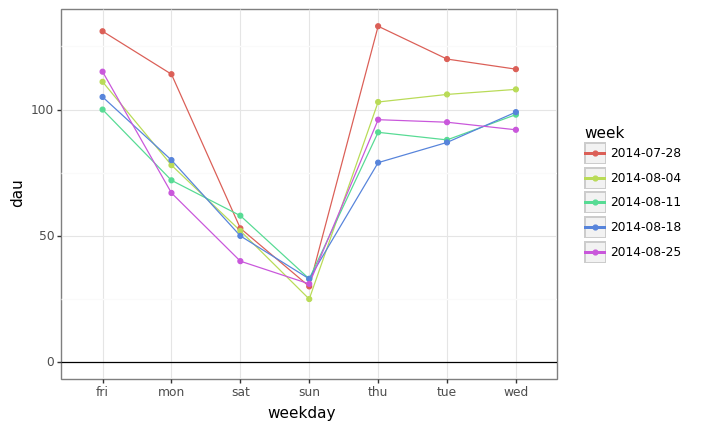

<ggplot: (8745198099396)>

In [24]:
(
    ggplot(cnt_login[cnt_login['week'] >= '2014-07-28'].assign(week = cnt_login['week'].astype(str)), 
           aes('weekday', 'dau', color = 'week', group = 'week')) +
    gg.geom_line() +
    gg.geom_point() +
    gg.geom_hline(yintercept = 0) +
    gg.theme_bw()
)

# Itereators

In [25]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [28]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}